In [1209]:
import pandas as pd

In [1210]:
df = pd.read_csv('/content/drive/MyDrive/Data Analysis/Calculator/data/operatorData_small.csv')

## Create a function to select only all arithmetics operators 

In [1211]:
def selectArithmetics (d):
  return d[d['operator'].isin(['+', '-', '*', '/'])]
  #return d[d['operator'].isin(['*'])]

In [1212]:
df = selectArithmetics(df)

## Visualize the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbdbb296150>,
      dtype=object)

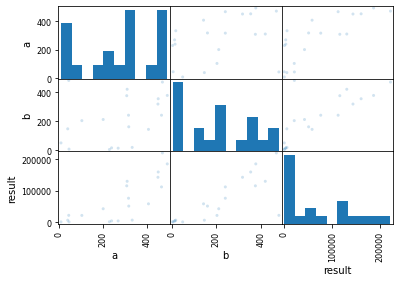

In [1213]:
pd.plotting.scatter_matrix(df[df['operator'] == '*'], alpha=0.2)

## Normalize the input & outputs

In [1214]:
df.a = df.a / 500
df.b = df.b / 500

In [1215]:
RESULT_MAX = 500000
df.result = df.result / RESULT_MAX

## Use 1-hot encoding for the operator

In [1216]:
operator_dummies = pd.get_dummies(df.operator)
df = pd.concat([df, operator_dummies], axis=1)

In [1217]:
df = df.drop(['operator'], axis=1)
df

a        b        result  *  +  -  /
0   0.51287  0.18600  6.988700e-04  0  1  0  0
1   0.37422  0.09647  4.706900e-04  0  1  0  0
2   0.25253  0.30204  5.545700e-04  0  1  0  0
3   0.39756  0.48509  8.826500e-04  0  1  0  0
4   0.05669  0.86391  9.206000e-04  0  1  0  0
..      ...      ...           ... .. .. .. ..
75  0.78164  0.41196  3.794737e-06  0  0  0  1
76  0.42755  0.92368  9.257534e-07  0  0  0  1
77  0.87590  0.78791  2.223350e-06  0  0  0  1
78  0.57925  0.50411  2.298109e-06  0  0  0  1
79  0.16765  0.07084  4.733201e-06  0  0  0  1

[80 rows x 7 columns]

## Train the model

In [1218]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Split the data to observation and target variable

In [1219]:
X = df[df.columns[~df.columns.isin(['result'])]]
y = df['result']

### Split data to train & test sets

In [1220]:
# Use 80% of the data for a training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Train the model

In [1221]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor

estimators = [
  ('lr', RidgeCV()),
  #('svr', svm.LinearSVR(random_state=42)),
  ('svr_p', svm.SVR(kernel='poly')),
  ('knr', KNeighborsRegressor(n_neighbors=6))
]

In [1222]:
clf = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=50,
                                          random_state=42)
).fit(X_train, y_train)
clf.score(X_test, y_test)

0.8261680213334037

## Train-a-brain

In [1223]:
from sklearn.neural_network import MLPRegressor

In [1224]:
ann = MLPRegressor(random_state=1, max_iter=55, activation='relu', solver='adam').fit(X_train, y_train)
ann.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (55) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.3246022849786371

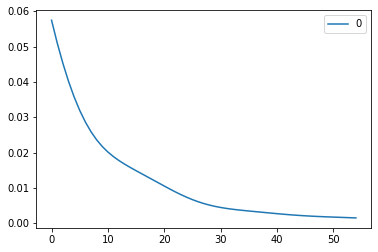

In [1225]:
pd.DataFrame(ann.loss_curve_).plot()

## Validate the model

In [1226]:
from sklearn import metrics

In [1227]:
# Load a validation set
val = pd.read_csv('/content/drive/MyDrive/Data Analysis/Calculator/data/operatorData_validation.csv')
val = selectArithmetics(val)
operator_dummies = pd.get_dummies(val.operator)
val = pd.concat([val, operator_dummies], axis=1).drop(['operator'], axis=1)

val.a = val.a / 500
val.b = val.b / 500
val.result = val.result / RESULT_MAX

X_val = val[val.columns[~val.columns.isin(['result'])]]
y_val = val['result']
ann_pred = ann.predict(X_val)
clf_pred = clf.predict(X_val)

In [1228]:
print('ANN')
metrics.mean_squared_error(y_val, ann_pred)

ANN


0.0029531122704363525

In [1229]:
print('CLF')
metrics.mean_squared_error(y_val, clf_pred)

CLF


0.00017292705694636393

In [1230]:
pred

array([-0.02411052,  0.03159406,  0.04591876,  0.04832209, -0.00132316,
       -0.05952959, -0.04698312, -0.03491647, -0.07405213, -0.00420265,
       -0.03331882,  0.02149967, -0.01255983,  0.0354302 , -0.04902452,
        0.0758442 , -0.04810682, -0.01236966, -0.02972227,  0.04617061,
       -0.00575648, -0.02796673, -0.0257936 , -0.04040908, -0.0330767 ,
       -0.02560998, -0.01517109, -0.03843937, -0.03619048, -0.02070609,
       -0.01391553, -0.01871157, -0.01897082, -0.0249958 , -0.01847366,
       -0.02019711, -0.01652039, -0.026041  , -0.00326881, -0.02342861,
        0.20815695,  0.18893632,  0.15278679,  0.19691036,  0.07416621,
        0.06125603,  0.07617766,  0.16194779,  0.16895515,  0.23176515,
        0.20000784,  0.13237606,  0.06710412,  0.09864962,  0.21667857,
        0.19159382,  0.11516943,  0.06098676,  0.1339751 ,  0.20271424,
       -0.00902895, -0.0007891 , -0.00081223, -0.00892861,  0.0008786 ,
        0.00389612, -0.00596395, -0.02975106, -0.00468187, -0.01

## Get input from user and predict the result

In [1235]:
#@title Calculate Value
A =  0#@param {type:"number"}
operator = "+" #@param ["+", "-", "*", "**", "/"]
B =  0#@param {type:"number"}

newData = {
    'a': [A / 500],
    'b': [B / 500]
}
newData[operator] = [1]

newData = pd.DataFrame(newData, columns = X_test.columns).fillna(0)
print('ANN: ' + str(ann.predict(newData)[0] * RESULT_MAX))
print('CLF: ' + str(clf.predict(newData)[0] * RESULT_MAX))

ANN: -40293.447453906825
CLF: 90.90637642651772
